In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np

import matplotlib.pyplot as plt
from keras import layers , models
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
imgSize=(128,128)
batchSize=32
epochs=8

In [6]:
def preprocessData(path):
  genData=ImageDataGenerator(rescale=1./255,validation_split=0.2)
  trainData=genData.flow_from_directory(path,target_size=imgSize,batch_size=batchSize,class_mode='categorical',subset='training')
  valData=genData.flow_from_directory(path,target_size=imgSize,batch_size=batchSize,class_mode='categorical',subset='validation')

  return trainData,valData

In [45]:
def cmodel(numclasses):
  model=models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(numclasses,activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [46]:
from ast import Num
path='/content/drive/MyDrive/Trainin'
trainData,valData=preprocessData(path)

Found 2505 images belonging to 3 classes.
Found 625 images belonging to 3 classes.


In [47]:
numclasses=len(trainData.class_indices)
model=cmodel(numclasses)

history=model.fit(trainData,epochs=epochs,validation_data=valData)
model.save('handGestmodel.h5')

Epoch 1/8
79/79 [==============================] - 126s 2s/step - loss: 0.0972 - accuracy: 0.9541 - val_loss: 1.9940 - val_accuracy: 0.7920
Epoch 2/8
79/79 [==============================] - 118s 1s/step - loss: 4.7582e-06 - accuracy: 1.0000 - val_loss: 2.1079 - val_accuracy: 0.7920
Epoch 3/8
79/79 [==============================] - 119s 2s/step - loss: 2.5342e-06 - accuracy: 1.0000 - val_loss: 2.1259 - val_accuracy: 0.7920
Epoch 4/8
79/79 [==============================] - 120s 2s/step - loss: 1.7521e-06 - accuracy: 1.0000 - val_loss: 2.1650 - val_accuracy: 0.7920
Epoch 5/8
79/79 [==============================] - 123s 2s/step - loss: 1.2719e-06 - accuracy: 1.0000 - val_loss: 2.1631 - val_accuracy: 0.7920
Epoch 6/8
79/79 [==============================] - 116s 1s/step - loss: 9.5650e-07 - accuracy: 1.0000 - val_loss: 2.1967 - val_accuracy: 0.7920
Epoch 7/8
79/79 [==============================] - 122s 2s/step - loss: 7.3152e-07 - accuracy: 1.0000 - val_loss: 2.2338 - val_accuracy: 0.7

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

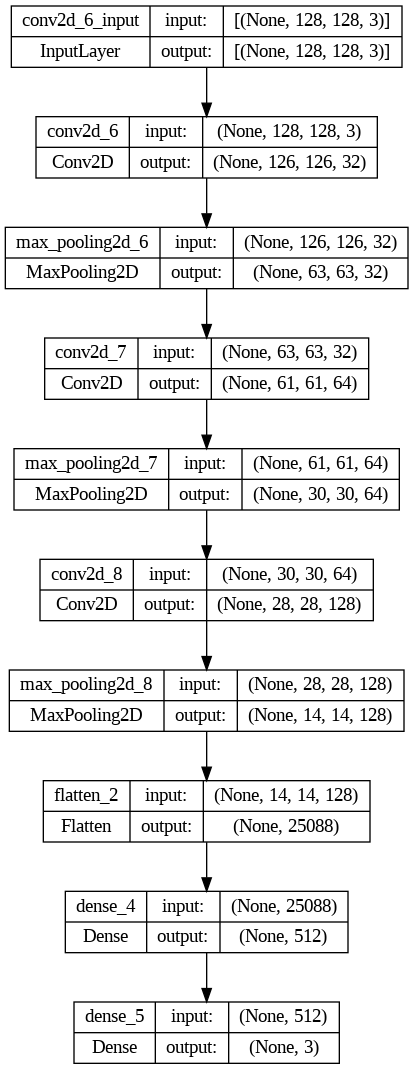

In [49]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [14]:
import skimage.io
from skimage.io import imread

In [50]:
model=models.load_model('handGestmodel.h5')

In [51]:
def predictHG(imgpath):
  img=imread(imgpath)
  imgArray=image.img_to_array(img)
  imgArray = tf.image.resize(imgArray, (128, 128))
  imgArray=np.expand_dims(imgArray,axis=0)
  imgArray=imgArray/255
  imgArray = tf.convert_to_tensor(imgArray)

  if imgArray.shape[-1] == 1:
    imgArray = tf.image.grayscale_to_rgb(imgArray)
  pred=model.predict(imgArray)
  predictClass=np.argmax(pred)

  classlabel=list(trainData.class_indices.keys())
  predictedGesture= classlabel[predictClass]
  return predictedGesture

1/1 [==============================] - 0s 37ms/step


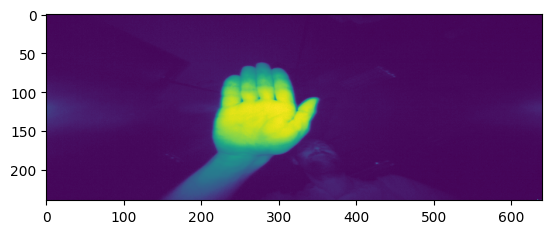

Palm


In [59]:
testimg='/content/drive/MyDrive/testin/00/01_palm/frame_03_01_0189.png'
predictgesture=predictHG(testimg)
imge=imread(testimg)
plt.imshow(imge)
plt.show()
print(predictgesture)

1/1 [==============================] - 0s 39ms/step


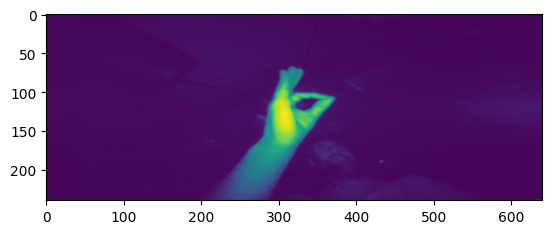

ok


In [60]:
testimg='/content/drive/MyDrive/testin/00/07_ok/frame_03_07_0190.png'
predicted_gesture = predictHG(testimg)

img=imread(testimg)
plt.imshow(img)
plt.show()
print(predicted_gesture)